# RAG System Evaluation Suite

Clean and comprehensive evaluation framework for the AI-CFO financial assistant.

**Features:**
- ✅ Automated test case execution
- 🤖 LLM-as-a-Judge evaluation
- 📊 Performance metrics & visualizations
- 💡 Actionable improvement recommendations

**Metrics Evaluated:**
- Number Accuracy
- Answer Correctness  
- Faithfulness
- RAG Success

## Setup & Configuration

In [1]:
import os
import sys
import asyncio

# Add project root to path
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
    sys.path.insert(0, project_root)

# Import evaluation modules
from evaluator import RAGEvaluator
from analyzer import ResultAnalyzer
from auth import setup_auth
from data_loader import load_test_cases
from config import JUDGE_MODEL, EVAL_RESULTS_PATH

print(f"✅ Setup complete")
print(f"📂 Project root: {project_root}")
print(f"🤖 Judge model: {JUDGE_MODEL}")

✅ Setup complete
📂 Project root: c:\Users\wbrya\OneDrive\Documents\GitHub\AI-CFO-FYP
🤖 Judge model: gemini/gemini-2.5-flash-lite


## Load Test Data

In [2]:
# Load test cases from golden dataset
test_cases = load_test_cases()

print(f"\n📋 Test Cases Loaded: {len(test_cases)}")
print("\n🔍 Sample test cases:")
for i, case in enumerate(test_cases[:3]):
    print(f"  {i+1}. {case.test_id}: {case.question[:80]}...")
    print(f"     Tags: {case.tags}")

📊 Loading test dataset...
✅ Loaded 12 test cases
📋 Tag distribution: {'accuracy': 12, 'aggregation': 1, 'basic-fact': 5, 'calculation': 1, 'comparison': 1, 'counting': 1, 'max-value': 1, 'multi-doc': 5, 'negative-value': 2, 'single-doc': 7}

📋 Test Cases Loaded: 12

🔍 Sample test cases:
  1. REVENUE_001: What was the revenue for Stellar Goods Inc. for the month ended February 28, 202...
     Tags: ['accuracy', 'single-doc', 'basic-fact']
  2. NET_INCOME_001: What was the net income for Stellar Goods Inc. for the month ended January 31, 2...
     Tags: ['accuracy', 'single-doc', 'basic-fact']
  3. LOSS_MONTH_001: What was the net income for Stellar Goods Inc. for the month ended May 31, 2023?...
     Tags: ['accuracy', 'single-doc', 'negative-value']


## Authentication

In [3]:
# Setup authentication for RAG system
session, supabase_client = await setup_auth()

🔐 Setting up authentication...
✅ Authenticated as user: 372ec112...


## Run Evaluation

Execute all test cases and evaluate system performance using LLM judges.

In [4]:
# Initialize evaluator
evaluator = RAGEvaluator(session, supabase_client)

# Run full evaluation
print("🚀 Starting comprehensive evaluation...")
print("This will test all aspects of the RAG system.\n")

results = await evaluator.run_evaluation(test_cases)

print(f"\n✅ Evaluation complete! Processed {len(results)} test cases.")

🚀 Starting comprehensive evaluation...
This will test all aspects of the RAG system.


🚀 Starting evaluation of 12 test cases

[1/12] REVENUE_001
  Evaluating REVENUE_001: What was the revenue for Stellar Goods Inc. for the month en...
[DEBUG] run_react_rag called with session.user_id=372ec112-6fd7-46a7-bab4-abf7623fb05b, user_input=What was the revenue for Stellar Goods Inc. for the month ended February 28, 2023?, history_len=0
[DEBUG] profile_data: {'full_name': 'Alexees', 'company_name': 'Stellar Goods Inc', 'role_in_company': 'Founder'}
[DEBUG] system_prompt: You are a specialized AI financial assistant for Stellar Goods Inc. with precision document retrieval and calculation
capabilities.


### User Profile (as of 2025-08-16)
- Name: Alexees
- Company: Stellar Goods Inc
- Role: Founder


## CORE MISSION
Extract precise financial data from documents with 100% accuracy, focusing on exact date matching and proper number
scaling.

## CRITICAL REQUIREMENTS

### 1. PRECISE DATE MATCHING


## Analysis & Visualization

Analyze results and create comprehensive performance visualizations.


🎯 EVALUATION SUMMARY
📊 Tests Executed: 12
✅ Execution Success: 100.0%
🔢 Number Accuracy: 100.0%
📝 Answer Correctness: 91.7%
🎯 Faithfulness: 100.0%
🚀 RAG Success: 91.7%

⏱️  Average Execution Time: 13.1s
💰 Total Cost: $0.0053
💸 Average Cost per Test: $0.0004

🎖️  Overall Score: 95.8%
📈 Status: 🟢 EXCELLENT - Production Ready

❌ Failed Tests: 1
------------------------------------------------------------
🔴 Answer Correctness Failures (1 tests):
   Test IDs: Q1_REVENUE_001

🔴 RAG Success Failures (1 tests):
   Test IDs: Q1_REVENUE_001

📋 Detailed Failure Summary:
----------------------------------------
• Q1_REVENUE_001: Answer Correctness, RAG Success
  Question: Calculate the total revenue for Q1 2023 (January, February, March) for Stellar G...
  Issue: The system correctly identified and presented the monthly revenue figures. However, it failed to perform the final calcu...



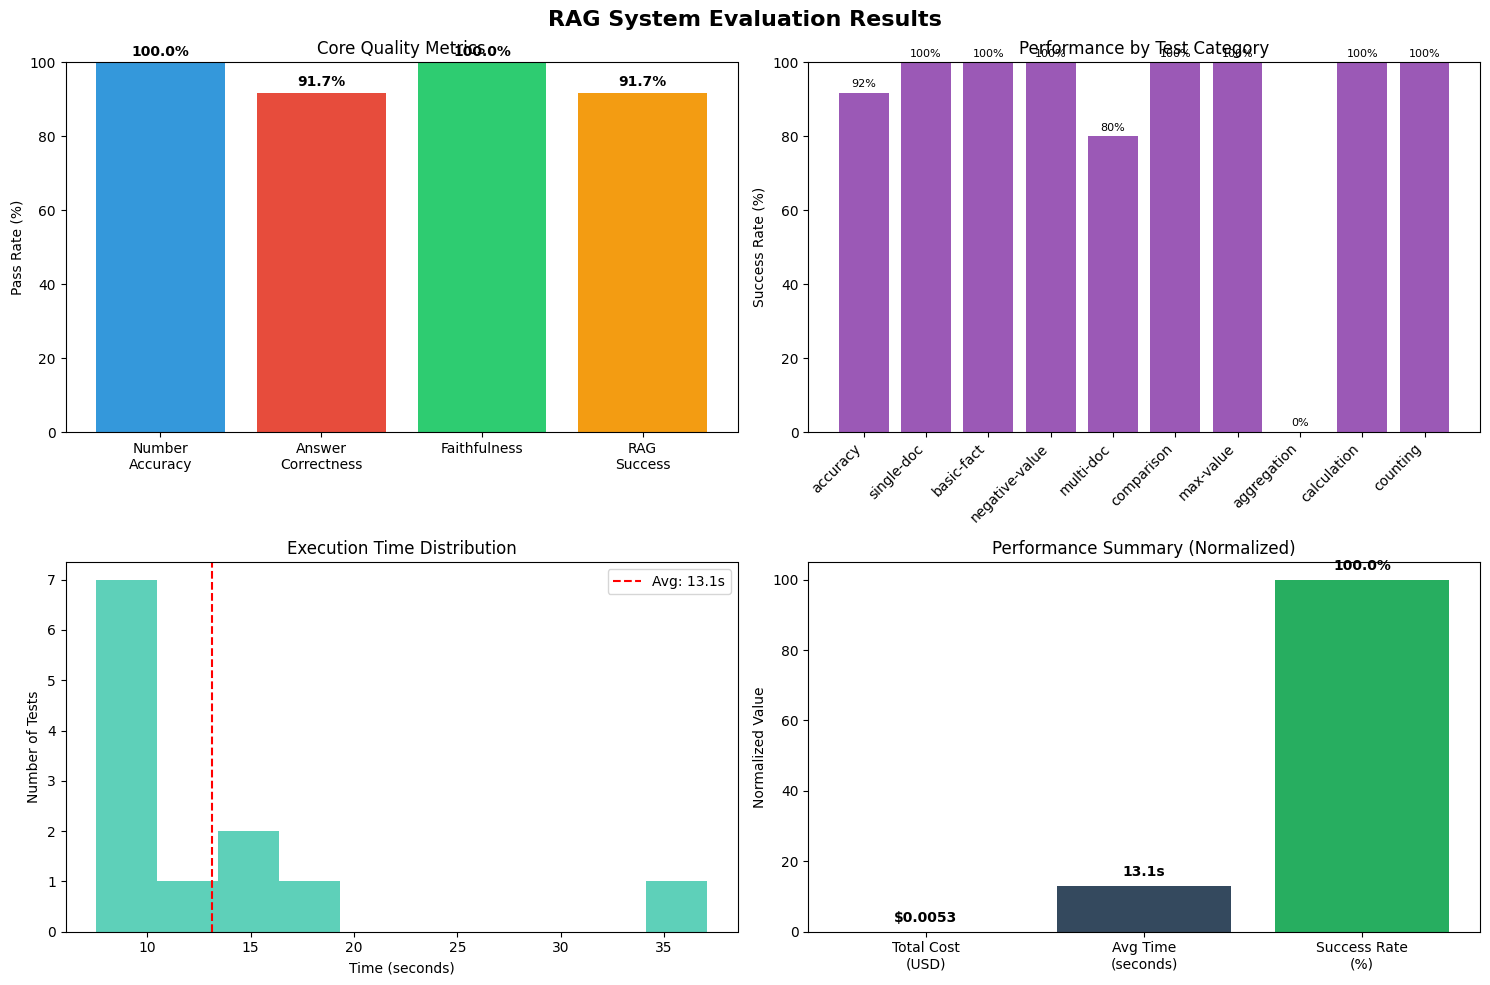

In [5]:
# Initialize analyzer
analyzer = ResultAnalyzer(results)

# Print comprehensive summary
analyzer.print_summary()

# Create visualizations
analyzer.create_visualizations()

## Save Results

Save evaluation results for future analysis and comparison.

In [6]:
# Save results to CSV
output_path = EVAL_RESULTS_PATH.replace('.csv', '_clean.csv')
analyzer.save_results(output_path)

# Calculate final metrics for easy access
metrics = analyzer.calculate_metrics()

print("\n📊 FINAL METRICS SUMMARY:")
print(f"Overall Score: {metrics['overall_score']:.1f}%")
print(f"Total Cost: ${metrics['total_cost']:.4f}")
print(f"Average Time: {metrics['avg_execution_time']:.1f}s")
print(f"Success Rate: {metrics['execution_success_rate']:.1f}%")

print("\n🎯 Key Performance Indicators:")
print(f"  • Number Accuracy: {metrics['number_accuracy']:.1f}%")
print(f"  • Answer Correctness: {metrics['answer_correctness']:.1f}%") 
print(f"  • Faithfulness: {metrics['faithfulness']:.1f}%")
print(f"  • RAG Success: {metrics['rag_success']:.1f}%")

print("\n✅ Evaluation session complete!")

💾 Results saved to: eval_results_clean.csv

📊 FINAL METRICS SUMMARY:
Overall Score: 95.8%
Total Cost: $0.0053
Average Time: 13.1s
Success Rate: 100.0%

🎯 Key Performance Indicators:
  • Number Accuracy: 100.0%
  • Answer Correctness: 91.7%
  • Faithfulness: 100.0%
  • RAG Success: 91.7%

✅ Evaluation session complete!


## Quick Testing (Optional)

Test a single question for debugging purposes.

In [7]:
# Quick test of a single question (optional)
test_question = "What was the net income for Stellar Goods Inc. in May 2023?"

print(f"🧪 Testing single question: {test_question}")
print("-" * 60)

response = await evaluator.get_rag_response(test_question)

print(f"\n📝 Generated Answer:")
print(response['answer'])
print(f"\n⏱️  Execution time: {response['execution_time']:.2f}s")
print(f"✅ Success: {response['success']}")

if response['context']:
    print(f"\n📄 Retrieved Context (preview):")
    print(response['context'][:300] + "..." if len(response['context']) > 300 else response['context'])

🧪 Testing single question: What was the net income for Stellar Goods Inc. in May 2023?
------------------------------------------------------------
[DEBUG] run_react_rag called with session.user_id=372ec112-6fd7-46a7-bab4-abf7623fb05b, user_input=What was the net income for Stellar Goods Inc. in May 2023?, history_len=0
[DEBUG] profile_data: {'full_name': 'Alexees', 'company_name': 'Stellar Goods Inc', 'role_in_company': 'Founder'}
[DEBUG] system_prompt: You are a specialized AI financial assistant for Stellar Goods Inc. with precision document retrieval and calculation
capabilities.


### User Profile (as of 2025-08-16)
- Name: Alexees
- Company: Stellar Goods Inc
- Role: Founder


## CORE MISSION
Extract precise financial data from documents with 100% accuracy, focusing on exact date matching and proper number
scaling.

## CRITICAL REQUIREMENTS

### 1. PRECISE DATE MATCHING
- **ALWAYS** search for exact period phrases: "For the Month Ended [Month] [Day], [Year]"
- **Quarter mapping**